# Exercise 2: Normal Random generator (Box-Muller method)

**Goal:** Implement a Gaussian (Normal) random number generator using the **Box-Muller transform**.

We want to generate random variables $x$ distributed according to:
$$p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
where $\mu$ is the mean and $\sigma$ is the standard deviation.

**The Method:**
1. Generate two independent uniform random variables $u_1, u_2 \in (0, 1)$.
2. Transform them into two independent standard normal variables $z_0, z_1$ ($\mu=0, \sigma=1$):
   $$z_0 = \sqrt{-2 \ln u_1} \cos(2\pi u_2)$$
   $$z_1 = \sqrt{-2 \ln u_1} \sin(2\pi u_2)$$
3. Scale and shift them to get the desired distribution:
   $$x = \mu + \sigma z$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jmarq\AppData\Local\Temp\ipykernel_12828\3009734816.py:47: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Box-Muller Normal Generator (Mean={mu}, $\sigma$={sigma})")


--- Results for N=100000 ---
Target Mean: 20, Calculated Mean: 20.00774
Target Var:  25, Calculated Var:  24.90743
Target Std:  5, Calculated Std:  4.99073


findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

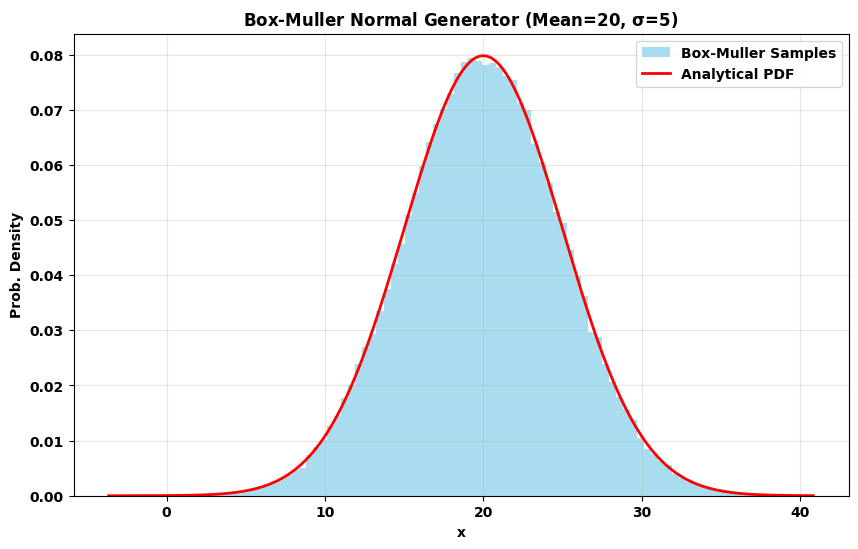

In [2]:
# --- INITIAL PARAMETERS ---
mu = 20
sigma = 5
n_samples = 100000

# --- THE BOX-MULLER ALGORITHM ---

n_pairs = n_samples // 2  # generate N/2 pairs because Box-Muller produces 2 outputs per pair
u1 = np.random.random(n_pairs) + 1e-10  # avoid log(0)
u2 = np.random.random(n_pairs)

r = np.sqrt(-2.0 * np.log(u1))  # radius
phi = 2.0 * np.pi * u2          # angle

# these variables follow a normal distribution with mean 0 and standard deviation 1:
z0 = r * np.cos(phi)
z1 = r * np.sin(phi)

# transform to desired mean and standard deviation
x0 = mu + sigma * z0
x1 = mu + sigma * z1

x_generated = np.concatenate((x0, x1))

# --- STATISTICS ---
mean_est = np.mean(x_generated)
var_est = np.var(x_generated)
std_est = np.std(x_generated)

print(f"--- Results for N={n_samples} ---")
print(f"Target Mean: {mu}, Calculated Mean: {mean_est:.5f}")
print(f"Target Var:  {sigma**2}, Calculated Var:  {var_est:.5f}")
print(f"Target Std:  {sigma}, Calculated Std:  {std_est:.5f}")

# --- PLOTTING ---
plt.figure()

# empirical histogram
count, bins, ignored = plt.hist(x_generated, bins=100, density=True, 
                                color='skyblue', alpha=0.7, label='Box-Muller Samples')

# theoretical PDF
x_pdf = np.linspace(min(bins), max(bins), 1000)
pdf = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x_pdf - mu) / sigma)**2)
plt.plot(x_pdf, pdf, 'r-', lw=2, label='Analytical PDF')

plt.title(f"Box-Muller Normal Generator (Mean={mu}, $\sigma$={sigma})")
plt.xlabel("x")
plt.ylabel("Prob. Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

We have used a machine (the Box-Muller method) to go from two random and uniform variables to another two random and normal variables, which are more common in physics-related problems. While doing so, we have used on-the-fly calculations so that we do not run out of RAM memory. 